In [1]:
# 多行输出结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[opencv-python docs](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. 读写图片

- cv2.imread()
- cv2.imshow()
- cv2.imwrite()

### 1.1 cv2.imread
`cv2.imread(path, flag)`  
- path 不能包含中文字符，且读取失败都不会有错误提示，直到使用时才提示
- flag: `cv2.IMREAD_COLOR`: 忽略透明度的彩色图，默认值  
        `cv2.IMREAD_GRAYSCALE`: 灰度图  
        `cv2.IMREAD_UNCHANGED`: 保留透明度  
三者简写为: `1`, `0`, `-1`

如读取成功那返回的数据是 `numpy.ndarray`，读取失败则返回 `None`。可以对此 array 进行切片来选取区域或者修改像素值等操作

In [6]:
img_path = './lena.jpg'
img_gray = cv2.imread(img_path, 0)
img_colo = cv2.imread(img_path)
type(img_gray)

img_gray.shape
img_colo.shape

numpy.ndarray

(350, 350)

(350, 350, 3)

### 1.2 cv2.imshow
`cv2.imshow(windowNname, img)`  
- windowName: 图像窗口的名字。

图像窗口的其他函数：  
1. `cv2.waitKey(delay)`:  让窗口保持 delay 毫秒（如果 delay 小于等于 0 则表示无限地保持。），并且期间如果有按键按下会使其提前终止并返回按键键值码。
2. `cv2.namedWindow('lena2', 0)`: [关于namedWindow更多的 flags](https://docs.opencv.org/3.1.0/d7/dfc/group__highgui.html#gabf7d2c5625bc59ac130287f925557ac3)。最常用的有对窗口大小是否固定(`cv2.WINDOW_AUTOSIZE`: 默认，由图片决定，对应整型为 `1`???; `cv2.WINDOW_NORMAL`: 不固定，可调节,，对应整型为 `0`???)  
3. `cv2.resizeWindow(windowName, (width, height))`: 对应窗口的长宽设置。（图像窗口有效，对于 toolbar无效，且需要 `cv2.namedWindow` 预先修改默认的 `WINDOW_AUTOSIZE` 为 `WINDOW_NORMAL`）
3. `cv2.destroyAllWindows()`:  关闭所有窗口  
4. `cv2.destroyWindow(windowName)`: 关闭对应名字的窗口
...

在 opencv 中彩色图像是以 `BGR` 存储的，所以在使用其他库的函数来可视化时需要逆转第三通道的顺序。  
逆转通道方法：  
1. `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`
2. `img[:, :, ::-1]`

注意：在使用 matplotlib imshow 显示灰度图时要修改默认，加 `cmap＝'gray'`

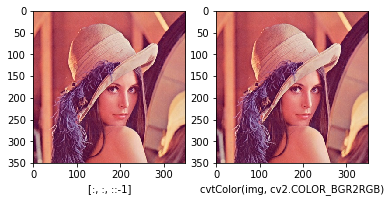

In [24]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(img_colo[:, :, ::-1]);
axes[0].set_xlabel('[:, :, ::-1]');

img_rgb = cv2.cvtColor(img_colo, cv2.COLOR_BGR2RGB);
axes[1].imshow(img_rgb);
axes[1].set_xlabel('cvtColor(img, cv2.COLOR_BGR2RGB)');

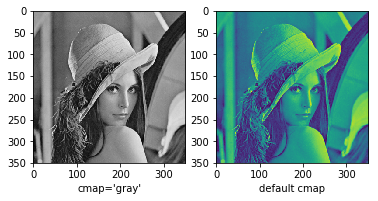

In [25]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(img_gray, cmap='gray');
axes[0].set_xlabel("cmap='gray'");

axes[1].imshow(img_gray);
axes[1].set_xlabel('default cmap');

### 1.3 cv2.imwrite
`cv2.imwrite('path&format', img)`: 写入成功会返回 `True`

In [27]:
cv2.imwrite('lena_gray.png', img_gray)

True

## 2. 视频与摄像头
- `cv2.VideoCapture`
- `cv2.VideoWriter`

### 2.1 打开摄像头与查看视频
打开摄像头与查看视频都是使用 `cv2.VideoCapture`。  

`cv2.VideoCapture()`：  
参数：
- 传入设备编号（如0, 1,...）表示打开对应摄像头。如果设备只有一个摄像头那编号就是 0(or -1)
- 传入本地视频路径，打开本地视频
返回 `VideoCapture` 类型，使用`isOpened()` 检查是否正确初始化，如果未初始化则使用 `open()` 方法来初始化。如果初始化成功则使用 `read()` 方法来读取每帧图像  

```python
video_path = 'vtest.avi'
cap = cv2.VideoCapture(video_path)

while(cap.isOpened()):
    ret, frame = cap.read()

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
```

### 2.2 输出视频
`cv2.VideoWriter('video', fourcc_code, frame_rate, frame_size)`: 

```python
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # open camera

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
        '''do something'''
        
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
```

## 3. 绘图功能
- cv2.line()
- cv2.circle()
- cv2.rectangle()
- cv2.ellipse(): 椭圆
- cv2.putText()
- cv2.polylines: 多边形

一些共有参数:
- img: 目标图片或者背景
- color: 线条或者形状的颜色。传入BGR顺序的元组为彩色，或者一个整型的数值时为灰色
- thickness: 线宽，默认为 1 。对于封闭的形状传入 -1 表示填充形状  
- lineType: 线条类型，可选参数为: LINE_4, LINE_8, LINE_AA。最后一个为抗锯齿线条

**需要注意的坐标轴是: 目标图片或背景的左上角为原点，右下角为(width, height)， numpy 的 shape (包括其他函数)顺序是 `[height, width, channels]`**

### 3.1 直线
`cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`: 在共有参数之外需要线的起点和终点。

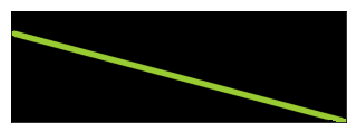

In [38]:
bg = np.zeros((100, 300, 3), dtype=np.uint8);  # 100: height    300: width
cv2.line(bg, (0, 20), (299, 99), (51, 204, 153), 3, cv2.LINE_AA)
# (0, 20): 起点, (300, 100): 终点, (51, 204, 153): 颜色草绿色的BGR, 3: 线宽
plt.imshow(bg[:, :, ::-1]); plt.xticks([]); plt.yticks([]);

### 3.2 矩形
`cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`: 正方形左上角坐标与右下角坐标

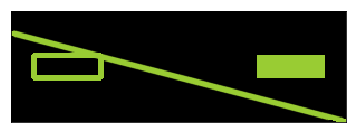

In [39]:
cv2.rectangle(bg, (20, 40), (80, 60), (51, 204, 153), 3)  # 未内填充的矩形
cv2.rectangle(bg, (220, 40), (280, 60), (51, 204, 153), -1)  # 内填充矩形
plt.imshow(bg[:, :, ::-1]); plt.xticks([]); plt.yticks([]);

### 3.3 圆
`cv2.circle(img, center, radius, color[, [thickness[, lineType[, shift]]]])`: center: 圆心坐标，radius: 半径

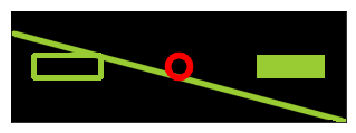

In [45]:
cv2.circle(bg, (150, 50), 10, (0, 0, 250), 3, cv2.LINE_AA)
plt.imshow(bg[:, :, ::-1]); plt.xticks([]); plt.yticks([]);

### 3.4 椭圆


In [42]:
help(cv2.ellipse)

Help on built-in function ellipse:

ellipse(...)
    ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a simple or thick elliptic arc or fills an ellipse sector.
    .   
    .   The function cv::ellipse with more parameters draws an ellipse outline, a filled ellipse, an elliptic
    .   arc, or a filled ellipse sector. The drawing code uses general parametric form.
    .   A piecewise-linear curve is used to approximate the elliptic arc
    .   boundary. If you need more control of the ellipse rendering, you can retrieve the curve using
    .   #ellipse2Poly and then render it with #polylines or fill it with #fillPoly. If you use the first
    .   variant of the function and want to draw the whole ellipse, not an arc, pass `startAngle=0` and
    .   `endAngle=360`. If `startAngle` is greater than `endAngle`, they are swapped. The figure below explains
    .   the meaning of the parameters to draw the blue arc.
